# Problem statement
Fake News Detection
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.


Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.
For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.

# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("true.csv")

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
df_true.tail(10)

,title,text,subject,date
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017"
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017"
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017"
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
df_true.shape

(21417, 4)

In [7]:
df_fake.shape

(23481, 4)

In [8]:
df_true.info

<bound method DataFrame.info of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuter

In [9]:
df_fake.info

<bound method DataFrame.info of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was rev

In [10]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

# Data cleaning and preparation

In [12]:
# Add flag to track fake and real
df_fake['target'] = 'fake'
df_true['target'] = 'true'

In [13]:
df_fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [14]:
df_true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [15]:
# Concatenate dataframes
data = pd.concat([df_fake,df_true]).reset_index(drop = True)
data.shape

(44898, 5)

In [16]:
data.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [17]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [18]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [19]:
# Check the data
data.head()

,title,text,subject,date,target
0,19 SECONDS OF DRAMA: After McCain’s Vote of Be...,Senator John McCain was overheard saying a sic...,politics,"Jul 29, 2017",fake
1,"Trump Has A Really, REALLY Disturbing Bedtime...",Donald Trump s two month old presidency has be...,News,"March 21, 2017",fake
2,MELANIA WINS HUGE SETTLEMENT FROM TABLOID Over...,Melania Trump just accepted damages of approxi...,left-news,"Apr 12, 2017",fake
3,Challenges to Trump's immigration orders sprea...,"(In this Jan. 31 story, in 11th paragraph cor...",politicsNews,"January 31, 2017",true
4,[VIDEO] BUMBLING US DEFENSE SEC. CAN’T ANSWER ...,Yeah you know the Obama regime is serious abou...,Government News,"Jul 8, 2015",fake


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [21]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,19 SECONDS OF DRAMA: After McCain’s Vote of Be...,Senator John McCain was overheard saying a sic...,politics,fake
1,"Trump Has A Really, REALLY Disturbing Bedtime...",Donald Trump s two month old presidency has be...,News,fake
2,MELANIA WINS HUGE SETTLEMENT FROM TABLOID Over...,Melania Trump just accepted damages of approxi...,left-news,fake
3,Challenges to Trump's immigration orders sprea...,"(In this Jan. 31 story, in 11th paragraph cor...",politicsNews,true
4,[VIDEO] BUMBLING US DEFENSE SEC. CAN’T ANSWER ...,Yeah you know the Obama regime is serious abou...,Government News,fake


In [22]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Senator John McCain was overheard saying a sic...,politics,fake
1,Donald Trump s two month old presidency has be...,News,fake
2,Melania Trump just accepted damages of approxi...,left-news,fake
3,"(In this Jan. 31 story, in 11th paragraph cor...",politicsNews,true
4,Yeah you know the Obama regime is serious abou...,Government News,fake


In [23]:
data.info

<bound method DataFrame.info of                                                     text          subject  \
0      Senator John McCain was overheard saying a sic...         politics   
1      Donald Trump s two month old presidency has be...             News   
2      Melania Trump just accepted damages of approxi...        left-news   
3       (In this Jan. 31 story, in 11th paragraph cor...     politicsNews   
4      Yeah you know the Obama regime is serious abou...  Government News   
...                                                  ...              ...   
44893  21st Century Wire says Trump has begun his war...          US_News   
44894  CHICAGO (Reuters) - A group of black pastors b...     politicsNews   
44895  Last night, the Republican primary went where ...             News   
44896  It s hard to read stories like this without wo...        left-news   
44897  Google is the search engine the majority of pe...         politics   

      target  
0       fake  
1       fake 

In [24]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,senator john mccain was overheard saying a sic...,politics,fake
1,donald trump s two month old presidency has be...,News,fake
2,melania trump just accepted damages of approxi...,left-news,fake
3,"(in this jan. 31 story, in 11th paragraph cor...",politicsNews,true
4,yeah you know the obama regime is serious abou...,Government News,fake


In [25]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [26]:
# Check
data.head()

,text,subject,target
0,senator john mccain was overheard saying a sic...,politics,fake
1,donald trump s two month old presidency has be...,News,fake
2,melania trump just accepted damages of approxi...,left-news,fake
3,in this jan 31 story in 11th paragraph correc...,politicsNews,true
4,yeah you know the obama regime is serious abou...,Government News,fake


In [27]:
data.tail()

,text,subject,target
44893,21st century wire says trump has begun his war...,US_News,fake
44894,chicago reuters a group of black pastors boyc...,politicsNews,true
44895,last night the republican primary went where n...,News,fake
44896,it s hard to read stories like this without wo...,left-news,fake
44897,google is the search engine the majority of pe...,politics,fake


Removing stopwords

In [28]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Hajari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
data.head()

,text,subject,target
0,senator john mccain overheard saying sick anti...,politics,fake
1,donald trump two month old presidency disastro...,News,fake
2,melania trump accepted damages approximately 3...,left-news,fake
3,jan 31 story 11th paragraph corrects show two ...,politicsNews,true
4,yeah know obama regime serious taking isis sen...,Government News,fake


In [30]:
data.tail()

,text,subject,target
44893,21st century wire says trump begun war hillary...,US_News,fake
44894,chicago reuters group black pastors boycotted ...,politicsNews,true
44895,last night republican primary went debate ever...,News,fake
44896,hard read stories like without wondering comma...,left-news,fake
44897,google search engine majority people world go ...,politics,fake


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


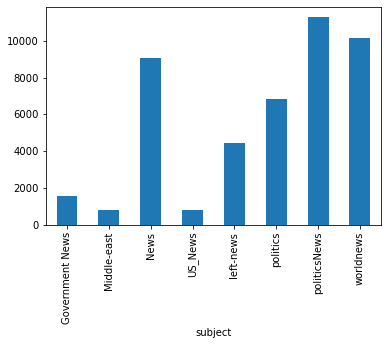

In [31]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


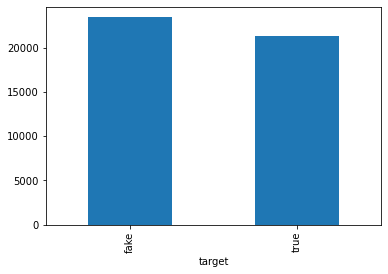

In [32]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

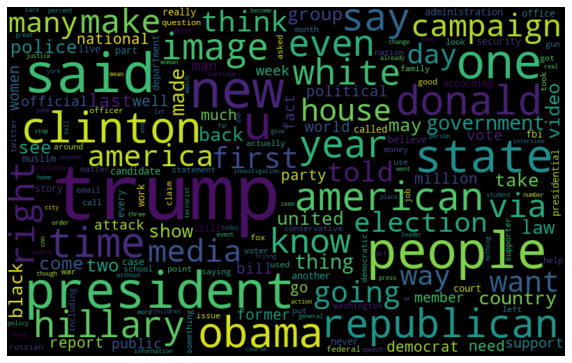

In [33]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

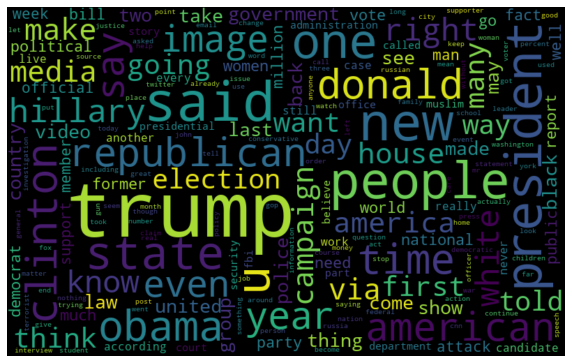

In [34]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [71]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(10,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [72]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

ValueError: min() arg is an empty sequence

<Figure size 720x576 with 0 Axes>

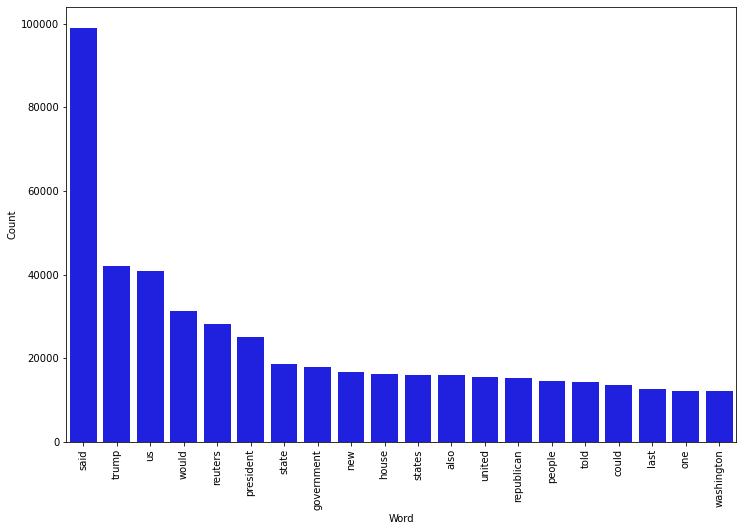

In [37]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [45]:
data['target']= encoder.fit_transform(data['target'])

In [46]:
data.head()

,text,subject,target
0,senator john mccain overheard saying sick anti...,politics,0
1,donald trump two month old presidency disastro...,News,0
2,melania trump accepted damages approximately 3...,left-news,0
3,jan 31 story 11th paragraph corrects show two ...,politicsNews,1
4,yeah know obama regime serious taking isis sen...,Government News,0


# Modeling

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
X = tfidf.fit_transform(data['text']).toarray()  # it gives sparse array --> convert to dense array

In [51]:
X.shape

(44898, 3000)

In [53]:
y = data['target'].values

In [54]:
y

array([0, 0, 0, ..., 0, 0, 0])

# Split Data

In [56]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score    
# spam classifier --> less false positive

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train, y_train)  # low precision model 
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9536748329621381
[[4351  257]
 [ 159 4213]]
0.9425055928411633


In [61]:
mnb.fit(X_train, y_train)   
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9477728285077951
[[4342  266]
 [ 203 4169]]
0.9400225479143179


In [62]:
bnb.fit(X_train, y_train)  # high precision model and better accuracy
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9726057906458797
[[4447  161]
 [  85 4287]]
0.9638039568345323


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
clfs = {
    'SVC': svc,
    'KN':knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [66]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [67]:
train_classifier(svc, X_train, y_train)

(0.9930957683741648, 0.9906648451730419)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9930957683741648
Precision 0.9906648451730419
For KN
Accuracy 0.707238307349666
Precision 0.9144079885877318
For NB
Accuracy 0.9477728285077951
Precision 0.9400225479143179
For DT
Accuracy 0.9962138084632517
Precision 0.9934030937215651
For LR
Accuracy 0.9951002227171493
Precision 0.9927140255009107
For RF
Accuracy 0.9978841870824053
Precision 0.9977132403384404
For AdaBoost
Accuracy 0.9962138084632517
Precision 0.9952054794520548


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy': accuracy_scores, 'Precision': precision_scores }).sort_values('Precision',ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.997884,0.997713
7,BgC,0.996993,0.997026
10,xgb,0.997884,0.996804
6,AdaBoost,0.996214,0.995205
9,GBDT,0.996102,0.993851
3,DT,0.996214,0.993403
4,LR,0.995100,0.992714
8,ETC,0.995323,0.992269
0,SVC,0.993096,0.990665
2,NB,0.947773,0.940023


# Hyper Parameter Tuning

In [ ]:
clf_rf=RandomForestClassifier(n_estimators=500,max_features='auto')
clf_rf(X_train, y_train)
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [ ]:
import pickle
pickle.dump(tfidf, open('vecotizer.pkl','wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))